In [19]:
from PIL import Image
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 
from skimage import filters, segmentation, feature, measure, morphology


csvfile = r'C:\Users\roumba\Documents\Software\deep-events\Videos\Video_1\Brightfield\labels1b.csv'
datacsv = pd.read_csv(csvfile)



In [82]:
def event_separation(data):
    #this function takes in the data from the excel file and splits them into a nested list: each list within the nested list corresponds to the excel lines of a single division 
    #it differentiates the lines based on conditions on both frame number and x,y-distance that could potentially be changed if they don't work
    length_of_file=len(data)-1
    all_event_lines=[]
    single_divison_events=[]
    for excelindex in range(0,length_of_file):
        framedataline1= data.iloc[excelindex,1] 
        framedataline2= data.iloc[excelindex+1,1] 
        framediff= abs(framedataline2-framedataline1)

        ydistancedataline1= data.iloc[excelindex,2]
        ydistancedataline2= data.iloc[excelindex+1,2]
        ydistancediff= abs(ydistancedataline2-ydistancedataline1)

        xdistancedataline1= data.iloc[excelindex,2]
        xdistancedataline2= data.iloc[excelindex+1,2]
        xdistancediff= abs(xdistancedataline2-xdistancedataline1)

        if framediff < 3 and ydistancediff <  10 and xdistancediff < 10 :
            single_divison_events.append(excelindex)
            if excelindex == length_of_file-1:
                single_divison_events.append(excelindex+1)
                all_event_lines.append(single_divison_events)
        else:
            single_divison_events.append(excelindex)
            all_event_lines.append(single_divison_events)
            single_divison_events=[]
    return all_event_lines


In [95]:
imagefile= r'C:\Users\roumba\Documents\Software\deep-events\Videos\Video_1\Brightfield\220915_cos7_mitostaygold1_w1Brightfield.ome.tif'
img = Image.open(imagefile)
img.show()
img.seek(65)
img.show()

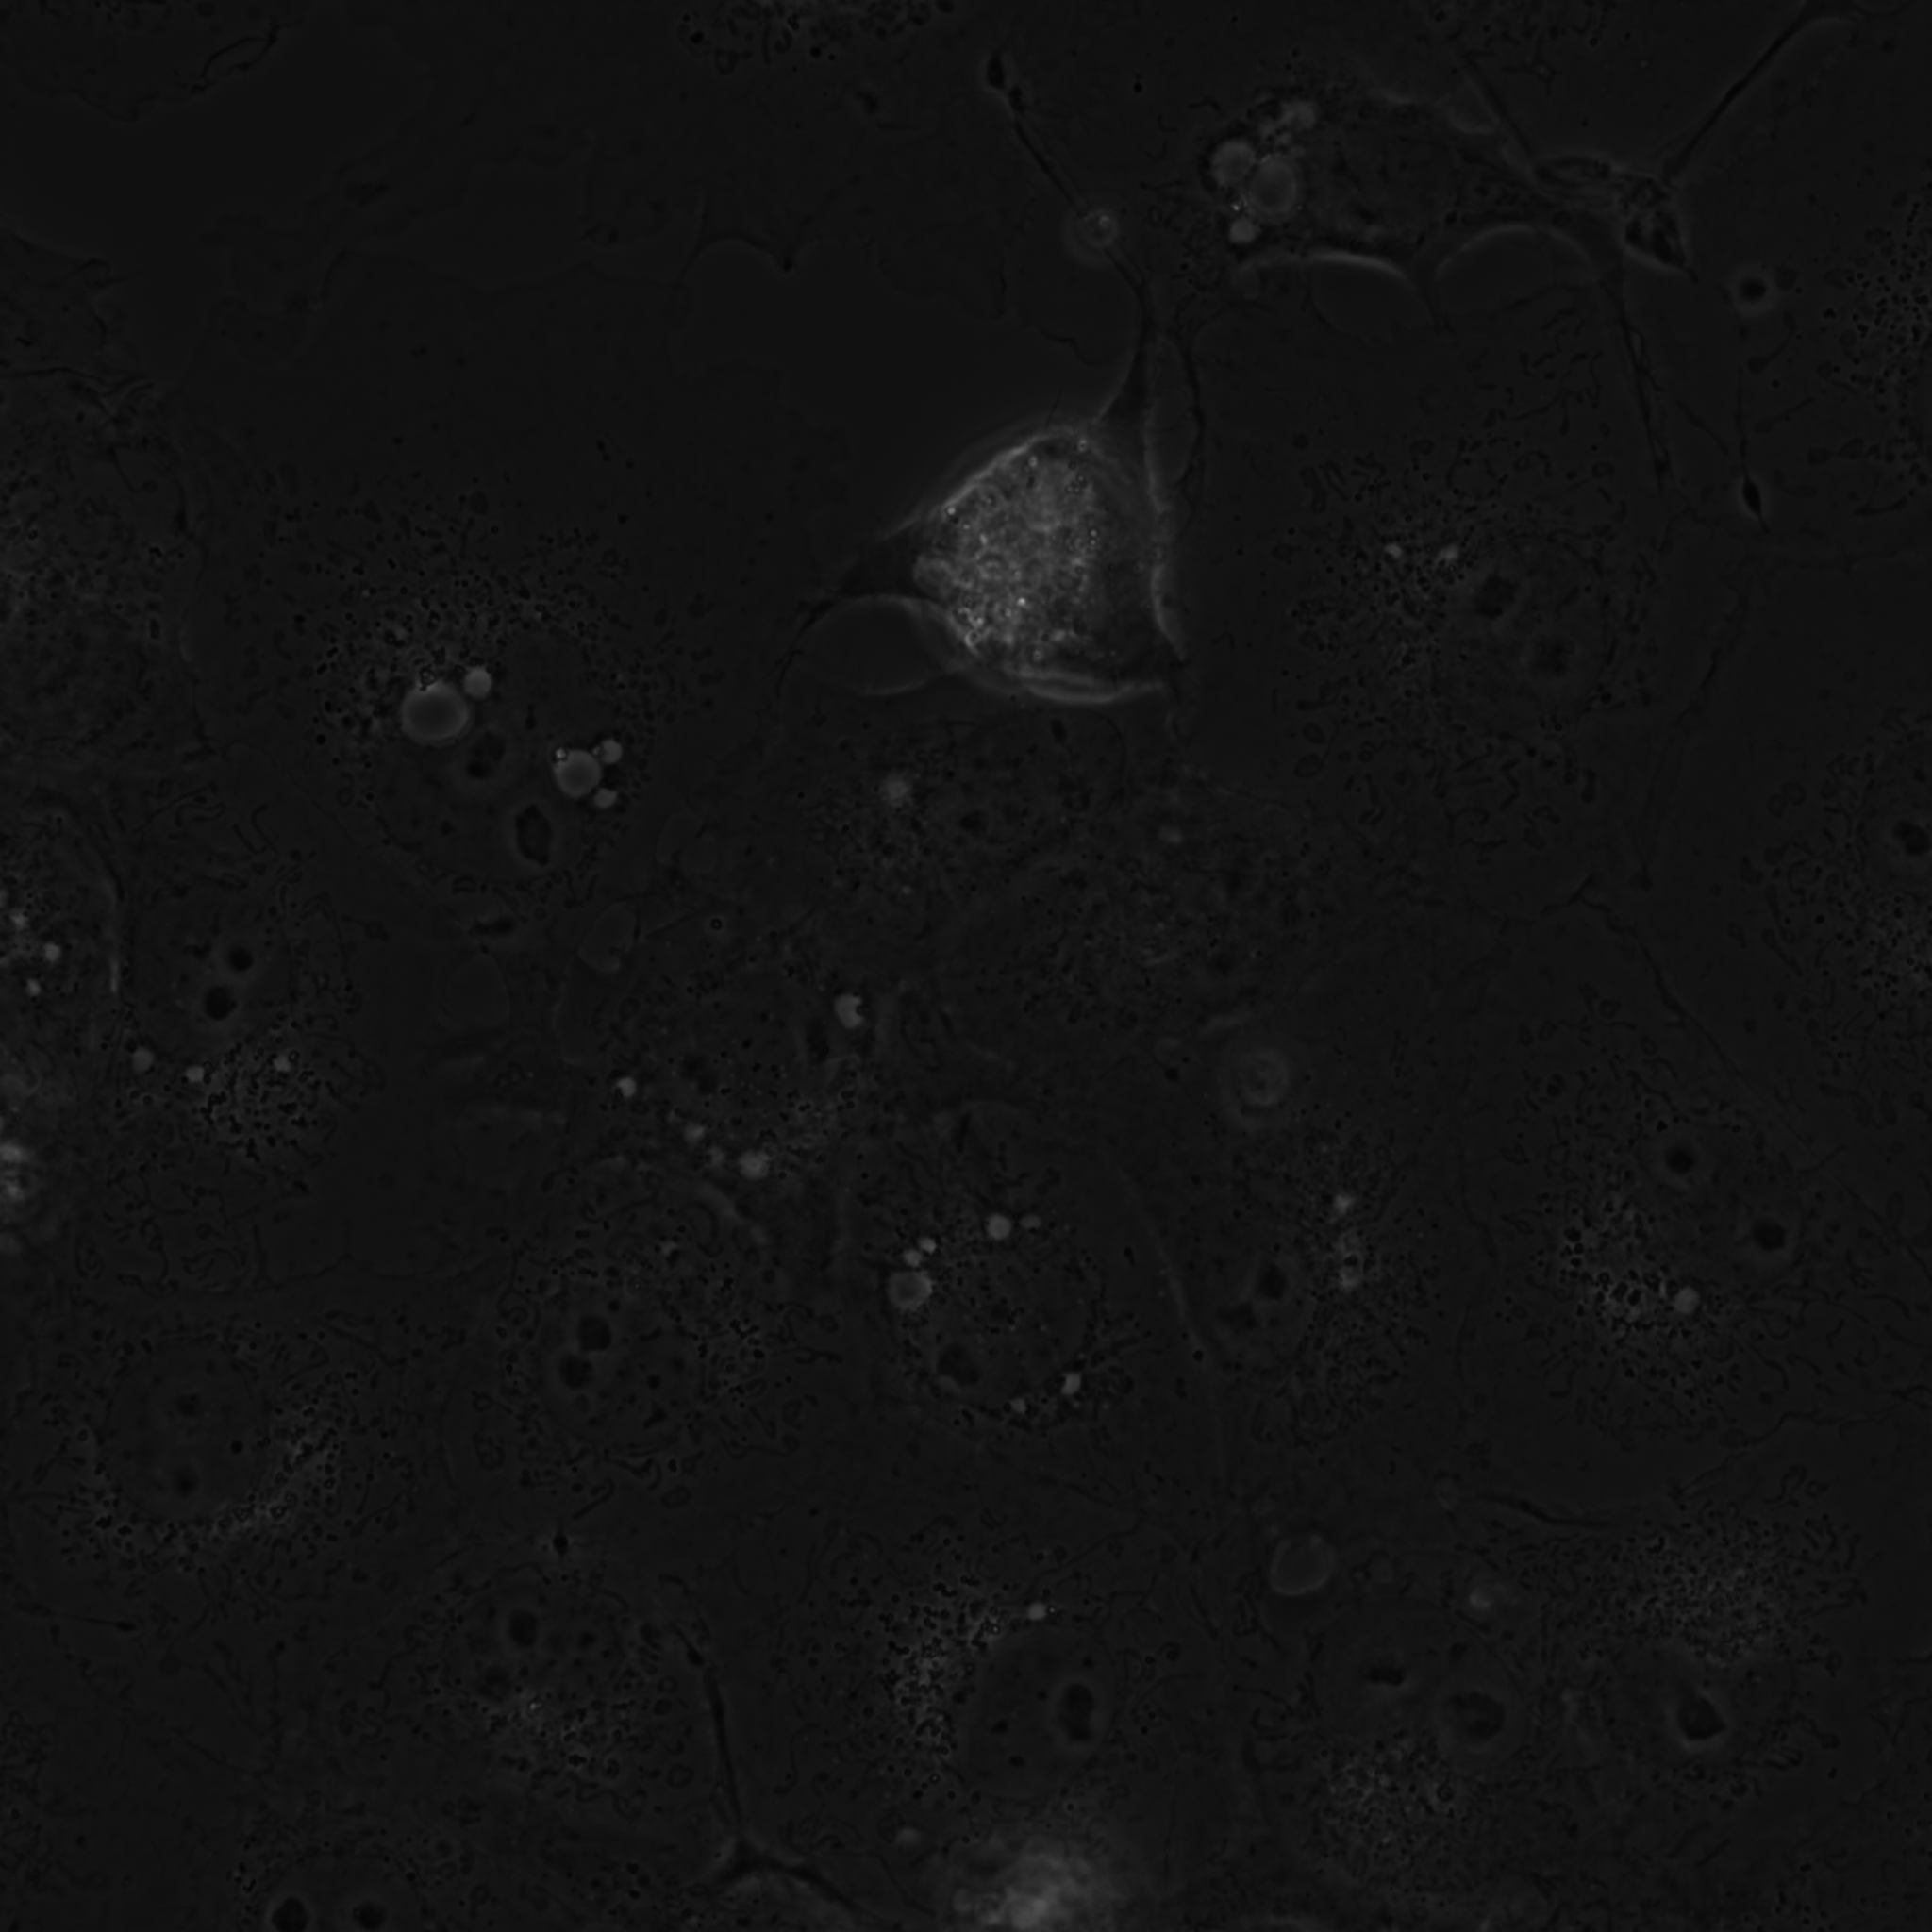

In [93]:
for rownumber in range (0, len(datacsv)):
    framenumber_in_row= int(datacsv.loc[rownumber, 'axis-0'])
    fission_ycoord = datacsv.loc[rownumber, 'axis-1']
    fission_xcoord = datacsv.loc[rownumber, 'axis-2']
    #img.seek(framenumber_in_row)
    pixel_map = img.load()
    #pixel_map[int(fission_ycoord),int(fission_xcoord)] = (255, 0, 0)
    #im2 = Image.fromarray(pixel_map)
    #pixel_map[int(fission_y),int(fission_x)] = img[int(fission_y),int(fission_x)].max()
    #dilation_radius = round(sigma)
    #mask = morphology.binary_dilation(p, morphology.disk(dilation_radius)) 
    #imageio.mimwrite(img, dataar)

In [77]:
def image_crop_save(l,list, data, img):   
    division_list=[]
    for index_list in range(0, l):
        l1=len(list[index_list])
        division_list=[]

        for index_list1 in range(0,l1):
            division_list.append(list[index_list][index_list1])
            minlist=division_list[0]
            maxlist=division_list[index_list1]

        data_croped= data.iloc[minlist:maxlist,1:4]
        frame1=int(data_croped['axis-0'].min())
        frame2=int(data_croped['axis-0'].max())
        ymean = data_croped['axis-1'].mean()
        xmean = data_croped['axis-2'].mean()
        ycrop1=ymean+128
        ycrop2=ymean-128
        xcrop1=xmean+128
        xcrop2=xmean-128
        dataar=np.zeros((frame2-frame1+1, 256, 256))

        for frame_index, frame_number in enumerate(range (frame1, frame2)):
            img.seek(frame_number-1) #starts from 0 I think?
            box = (xcrop2, ycrop2, xcrop1, ycrop1) #choose dimensions of box
            imcrop= img.crop(box)
        
            dataar[frame_index, :, :] = np.array(imcrop)

        import imageio
        currname = f'image_{index_list}.tiff'
        imageio.mimwrite(currname, dataar)
    return(dataar) 


In [ ]:
list1=event_separation(datacsv)
l=len(list1)
image_crop_save(l,list1, datacsv, img)


(array([[[4126., 4238., 4376., ..., 4325., 3955., 3752.],
         [4167., 4179., 4030., ..., 4394., 4263., 3823.],
         [3939., 4237., 4409., ..., 4300., 4187., 4102.],
         ...,
         [3591., 3867., 4168., ..., 3548., 3425., 3661.],
         [3647., 4246., 4419., ..., 3477., 3330., 3385.],
         [3885., 4406., 4603., ..., 3055., 3258., 3471.]],
 
        [[4295., 3609., 3160., ..., 4451., 4621., 4254.],
         [4167., 4137., 3818., ..., 4436., 4513., 4286.],
         [4149., 4405., 4326., ..., 4594., 4768., 4480.],
         ...,
         [3465., 3950., 4168., ..., 4128., 4094., 3830.],
         [3732., 4122., 4503., ..., 4227., 4037., 3972.],
         [4262., 4406., 4519., ..., 4150., 4219., 3890.]],
 
        [[4126., 4238., 4292., ..., 4033., 4454., 4337.],
         [4294., 4513., 4579., ..., 4561., 4764., 4707.],
         [4360., 4782., 5072., ..., 4888., 4685., 4899.],
         ...,
         [3424., 3617., 4000., ..., 3838., 3969., 3957.],
         [3437., 3955., 